# R básico
- **Conferencista:** Felipe Calvo Cepeda
	-	**Emails:**
		- fcalvoc@unal.edu.co
		- fe.calvo@uniandes.edu.co
	-	**GitHub:** [felipe-calvo](https://github.com/felipe-calvo)
- **Monitoras:**
  - Diana Carolina Sanchez Perez
    - **Email:** dicsanchezpe@unal.edu.co
  - Guiselle Tatiana Zambrano Penagos
    - **Email:** gtzambranop@unal.edu.co
- **Fecha de inicio:** 1 de octubre de 2020
- **Fecha de finalización:** 17 de octubre de 2020
- **Material utilizado en esta clase:**
  - [p2-basic-R](https://felipe-calvo.github.io/r-101/p2-basics-R.html)

# Limpieza de Datos

## Base de datos Boston Housing

Como hemos discutido con anterioridad, para todos los conjuntos de datos con los que trabajemos es importante tener un contexto en el cual tengamos información sobre cómo fueron recolectados, en qué año(s), qué técnicas de muestreo se usaron para obtener las observaciones y qué personas o entidades fueron los responsables.

- Si los datos los recolectamos nosotros hablamos de información primaria y en nuestros reportes/informes debemos hacer explícito el contexto referido.
- Si los datos los obtuvimos de otra fuenta hablamos de información secundaria y en los reportes derivados igualmente debemos procurar obtener y referenciar el contexto referido para los datos.

Para la base de datos Boston Housing, podemos consultar el contexto haciendo clic en [este tunel secreto](https://www.kaggle.com/c/boston-housing/overview/description).



In [2]:
# Cargamos los paquetes
library("tidyverse")
library("readxl")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
# Leemos los datos desde un archivo de Excel
read_xlsx(
  path = "data/Boston_Housing.xlsx", 
  sheet="Data"
) -> boston_housing_xlsx
str(boston_housing_xlsx)

tibble [506 × 14] (S3: tbl_df/tbl/data.frame)
 $ CRIM   : num [1:506] 0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num [1:506] 18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num [1:506] 2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : num [1:506] 0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num [1:506] 0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num [1:506] 6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num [1:506] 65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num [1:506] 4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : num [1:506] 1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num [1:506] 296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num [1:506] 15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num [1:506] 397 397 393 395 397 ...
 $ LSTAT  : num [1:506] 4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num [1:506] 24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


En cualquier escenario, es posible que tengamos datos faltantes. Veámos cómo abordar esta situación.

## Datos faltantes

Existen numerosos procesos de imputación de datos, entre otros:

- Usando la media de la variable
- HotDeck
- ColdDeck
- [MICE](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/)

Vamos a retirar algunos datos de la base de forma aleatoria.

In [6]:
# Instalamos el paquete mice
# install.packages("mice")

# Cargamos mice
library("mice")


Attaching package: ‘mice’


The following objects are masked from ‘package:base’:

    cbind, rbind




In [7]:
# Guardamos la base de datos en otro objeto llamado datos_completo
datos_completos <- boston_housing_xlsx
datos_completos

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5


In [9]:
# "amputamos" datos usando el método MCAR: missing completely at random
ampute(datos_completos, prop = 0.5, mech = "MCAR", run = TRUE)$amp -> datos_incompletos
datos_incompletos

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18.0,2.31,0,NA,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,NA,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,NA,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,NA,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5


In [10]:
# Mapeamos el número de NAs por cada columna
datos_incompletos %>% map_df(is.na) %>% colSums()

CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD     TAX 
     18      12      21      18      16      11      15      27      21      24 
PTRATIO       B   LSTAT    MEDV 
     19      18      15      18

Podemos hacer una visualización de los datos perdidos.

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



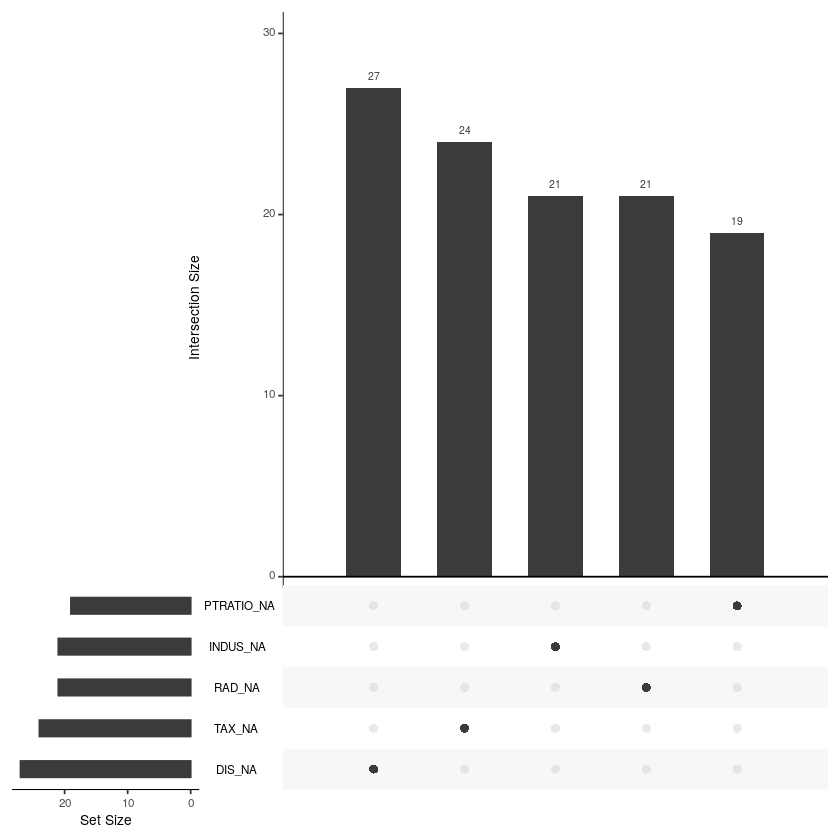

In [11]:
# Instalamos el paquete naniar
# install.packages("naniar")

# Cargamos el paquete naniar
library("naniar")

# Graficamos los datos incompletos
gg_miss_upset(datos_incompletos)